In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class Perceptron(object):
    def __init__(self, num_features, epoch=10, learning_rate=.01):
        """
        creates a perceptron model with specifies values
        :param num_features: number of inputs
        :param epoch: number of epochs of training session
        :param learning_rate: learning rate alpha
        :return: An object
        """
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.weights = np.random.randn(num_features + 1) * .01  # the first row is bias
        self.fpfn = []  # number of false-positive + false-negative samples in each epoch

    def net_input(self, x):
        """
        :param x: the input array
        :return: calculates the activation function input after weights multiplication
        """
        return np.dot(x, self.weights[1:]) + self.weights[0]

    def activation_function(self, X):
        """
        activation function
        :param X: numpy array input
        :return: result of sigmoid function
        """
        # s = 1 / (1 + np.exp(-X))
        return X

    def predict(self, inputs):
        """
        :param inputs: numpy array input
        :return: tests the inputs by the trained weights
        """
        summation = self.net_input(inputs)
        activation = self.activation_function(summation)
        if len(activation.shape) < 1:
            return 1 if activation > .9 else 0 if activation < .1 else activation
        else:
            return [1 if a_ > .9 else 0 if a_ < .1 else a_ for a_ in activation]

    def train(self, training_inputs, labels):
        """
        trains the weights and biases based on input data and their corresponding label
        :param training_inputs: numpy array input
        :param labels: numpy array input's labels
        """
        for _ in range(self.epoch):
            miss = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update
                miss += int(update != 0)

            self.fpfn.append(miss)

    def score(self, inputs, labels):
        """
        calculating the classifier score by simply counting the number of correct sample targets
        :param inputs: numpy array of input train data
        :param labels: numpy array of train data label
        :return: the score of 100
        """
        return (np.count_nonzero(np.asarray(self.predict(inputs)) == labels) * 100) / inputs.shape[0]
        # return accuracy_score(np.array(prediction), labels)

    def missed_samples_plot(self):
        plt.plot(range(1, len(self.fpfn) + 1), self.fpfn, marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('false-positive + false-negative')
        plt.show()


def dataset1():
    iris_dataset = pd.read_csv('iris.data', sep=',', header=None)
    # storing versicolor and setosa data
    # in addition to sepal length and petal length features
    X = iris_dataset.iloc[:100, [0, 2]].values
    y = iris_dataset.iloc[:100, -1].values
    y = np.where(y == 'Iris-setosa', 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
    return X, y, X_train, X_test, y_train, y_test


def dataset2():
    iris_dataset = pd.read_csv('iris.data', sep=',', header=None)
    # storing versicolor and virginica data
    # in addition to sepal width and petal width features
    X = iris_dataset.iloc[50:, [1, 3]].values
    y = iris_dataset.iloc[50:, -1].values
    y = np.where(y == 'Iris-virginica', 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
    return X, y, X_train, X_test, y_train, y_test


def decision_boundary(X, y, model, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.asarray(Z).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, marker=markers[idx], label=cl)
    plt.show()


In [ ]:
### part_2 section_1
X, _, X_train, X_test, y_train, y_test = dataset1()
perceptron = Perceptron(X.shape[1], epoch=100, learning_rate=.01)
perceptron.train(X_train, y_train)
print('the final weights are:', perceptron.weights)


the final weights are: [-0.06719748 -0.20274331  0.66749108]


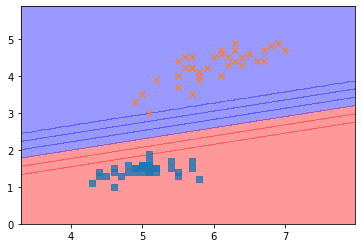

In [ ]:
### part_2 section_2
decision_boundary(X_train, y_train, perceptron)


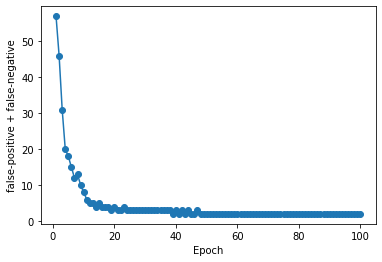

In [ ]:
### part_2 section_3
perceptron.missed_samples_plot()


In [ ]:
### part_2 section_4
print(perceptron.score(X_test, y_test))


96.66666666666667


the final weights are: [ 0.48273107  0.58375501 -0.97001008]


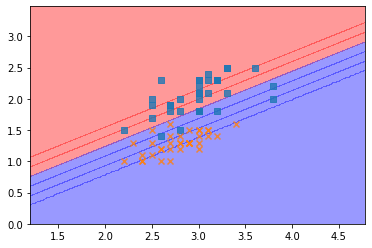

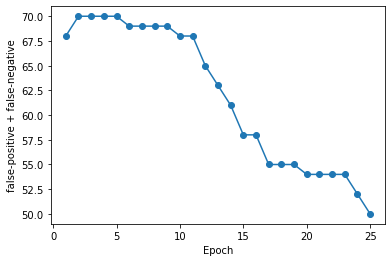

13.333333333333334


'as we witness in the decision boundary figure these two classes are inseparable therefore the \nclassifier is unable to reduce the classification error pass a certain amount \nthe score hardly reaches 80% even with 4000 epochs'

In [12]:
### part_3
X, _, X_train, X_test, y_train, y_test = dataset2()
perceptron = Perceptron(X.shape[1], epoch=25, learning_rate=.01)
perceptron.train(X_train, y_train)
print('the final weights are:', perceptron.weights)
decision_boundary(X_train, y_train, perceptron)
perceptron.missed_samples_plot()
print(perceptron.score(X_test, y_test))

'''as we witness in the decision boundary figure these two classes are inseparable therefore the 
classifier is unable to reduce the classification error pass a certain amount 
the score hardly reaches 80% even with 4000 epochs'''